<a href="https://colab.research.google.com/github/GeraldWambui/LearningDeepLearning/blob/main/animations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

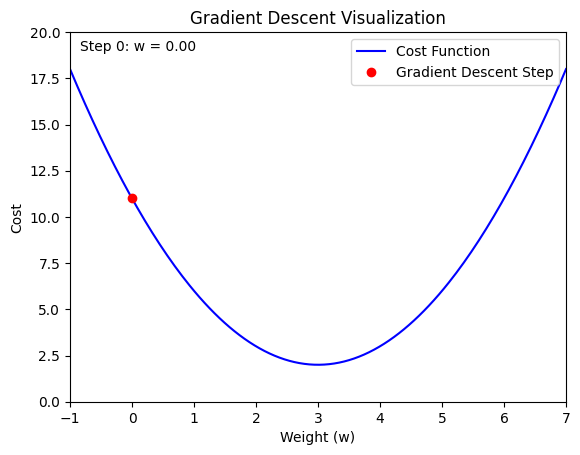

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Cost function: J(w) = (w - 3)^2 + 2 (Minimum at w = 3)
def cost(w):
    return (w - 3)**2 + 2

# Gradient of the cost function: dJ/dw = 2(w - 3)
def gradient(w):
    return 2 * (w - 3)

# Gradient Descent params
w_vals = [0]
alpha = 0.01
iterations = 300

# Perform Gradient Descent
for _ in range(iterations):
    w = w_vals[-1]
    w_new = w - alpha * gradient(w)
    w_vals.append(w_new)

w_vals = np.array(w_vals)
cost_vals = cost(w_vals)

# Create plot
fig, ax = plt.subplots()
w_range = np.linspace(-1, 7, 200)
cost_range = cost(w_range)
line, = ax.plot(w_range, cost_range, 'b-', label='Cost Function')
point, = ax.plot([], [], 'ro', label='Gradient Descent Step')
text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

ax.set_xlim(-1, 7)
ax.set_ylim(0, 20)
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Cost')
ax.set_title('Gradient Descent Visualization')
ax.legend()

# Animation function
def update(frame):
    point.set_data([w_vals[frame]], [cost_vals[frame]])
    text.set_text(f'Step {frame}: w = {w_vals[frame]:.2f}')
    return point, text

ani = animation.FuncAnimation(fig, update, frames=len(w_vals), interval=500, blit=True)
plt.show()


In [ ]:
ani.save("gradient_descent_anim.gif", writer="pillow")


ValueError: operands could not be broadcast together with shapes (1,5) (100,) 

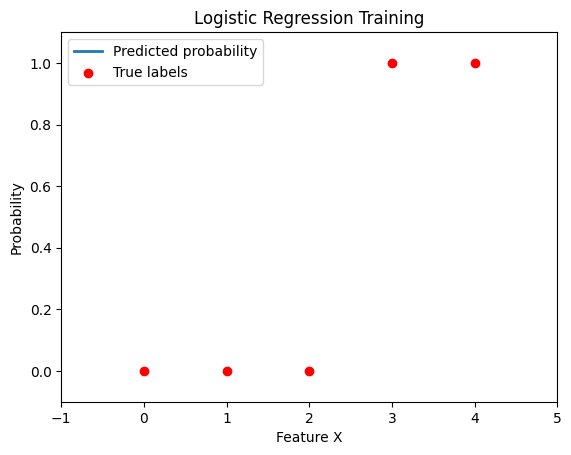

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Toy dataset (1 feature + binary labels)
X = np.array([[0], [1], [2], [3], [4]])  # Feature
y = np.array([0, 0, 0, 1, 1])            # Labels

# 2. Initialize parameters
w = 0.0
b = 0.0
lr = 0.1     # learning rate
epochs = 100

# 3. Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# For animation
w_history = []
b_history = []

# 4. Training loop (gradient descent)
for i in range(epochs):
    z = np.dot(X, w) + b
    y_hat = sigmoid(z)

    # Compute cost (optional for logging)
    cost = -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))

    # Compute gradients
    dw = np.dot(X.T, (y_hat - y)) / len(y)
    db = np.sum(y_hat - y) / len(y)

    # Update parameters
    w -= lr * dw
    b -= lr * db

    # Save for animation
    w_history.append(w)
    b_history.append(b)

# 5. Animate the sigmoid curve over epochs
fig, ax = plt.subplots()
x_vals = np.linspace(-1, 5, 100)
line, = ax.plot([], [], lw=2, label='Predicted probability')
scatter = ax.scatter(X, y, color='red', label='True labels')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-1, 5)
ax.set_xlabel('Feature X')
ax.set_ylabel('Probability')
ax.set_title('Logistic Regression Training')
ax.legend()

def update(frame):
    w = w_history[frame]
    b = b_history[frame]
    y_vals = sigmoid(w * x_vals + b)
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Epoch {frame + 1} | w = {w:.2f}, b = {b:.2f}")
    return line,

ani = FuncAnimation(fig, update, frames=len(w_history), interval=100, blit=True)
plt.show()


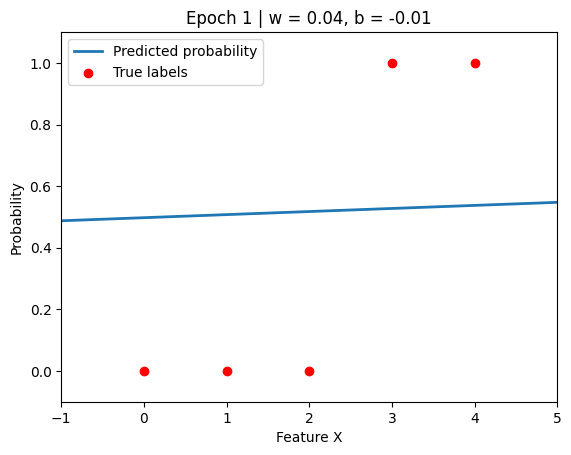

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Toy dataset (1 feature + binary labels)
X = np.array([[0], [1], [2], [3], [4]])  # Feature
y = np.array([0, 0, 0, 1, 1])            # Labels

# 2. Initialize parameters
# Initialize w as a (1,) NumPy array
w = np.array([0.0])
b = 0.0
lr = 0.1     # learning rate
epochs = 300

# 3. Sigmoid function
def sigmoid(z):
    # Ensure output has compatible shape for operations if z is not scalar/vector
    return 1 / (1 + np.exp(-z))

# For animation
w_history = []
b_history = []

# 4. Training loop (gradient descent)
for i in range(epochs):
    # z calculation: (5, 1) @ (1,) results in (5,)
    z = np.dot(X, w) + b
    # y_hat is (5,)
    y_hat = sigmoid(z)

    # Compute cost (optional for logging)
    # Ensure logs are handled correctly for potential small values
    cost = -np.mean(y * np.log(y_hat + 1e-15) + (1 - y) * np.log(1 - y_hat + 1e-15))

    # Compute gradients
    # dw: (1, 5) @ (5,) results in (1,)
    dw = np.dot(X.T, (y_hat - y)) / len(y)
    # db is scalar
    db = np.sum(y_hat - y) / len(y)

    # Update parameters
    # w is (1,) - scalar * (1,) results in (1,)
    w -= lr * dw
    # b is scalar - scalar results in scalar
    b -= lr * db

    # Save for animation
    w_history.append(w.copy()) # Append a copy of the (1,) array
    b_history.append(b)

# 5. Animate the sigmoid curve over epochs
fig, ax = plt.subplots()
x_vals = np.linspace(-1, 5, 100)
line, = ax.plot([], [], lw=2, label='Predicted probability')
scatter = ax.scatter(X, y, color='red', label='True labels')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-1, 5)
ax.set_xlabel('Feature X')
ax.set_ylabel('Probability')
ax.set_title('Logistic Regression Training')
ax.legend()

def update(frame):
    # Get the (1,) array weight and scalar bias
    w = w_history[frame]
    b = b_history[frame]
    # Calculate y_vals: (1,) * (100,) broadcasts to (100,), adding scalar b keeps it (100,)
    y_vals = sigmoid(w * x_vals + b)
    line.set_data(x_vals, y_vals)
    # Access the scalar value from the (1,) array for display
    ax.set_title(f"Epoch {frame + 1} | w = {w[0]:.2f}, b = {b:.2f}")
    return line,

# frames=len(w_history) is correct
ani = FuncAnimation(fig, update, frames=len(w_history), interval=100, blit=True)
plt.show()

In [ ]:
ani.save("logistic_regression_training_epoch_300.gif", writer="pillow")
